In [17]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [18]:

# Load the dataset
file_path = '100k_a.csv' 
df = pd.read_csv(file_path)

# Rename columns
df.columns = ['User ID', 'Stream ID', 'Streamer Username', 'Time Start', 'Time Stop']
df.head()


,User ID,Stream ID,Streamer Username,Time Start,Time Stop
0,1,33846768288,alptv,166,169
1,1,33886469056,mithrain,587,588
2,1,33887624992,wtcn,589,591
3,1,33890145056,jrokezftw,591,594
4,1,33903958784,berkriptepe,734,737


In [19]:

# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)



User ID              0
Stream ID            0
Streamer Username    0
Time Start           0
Time Stop            0
dtype: int64


In [20]:

# Count the number of interactions for each Stream ID
interaction_counts = df['Stream ID'].value_counts()

# Rank the streams based on interaction counts
ranked_streams = interaction_counts.sort_values(ascending=False)


In [21]:

# Get top 20 streams for recommendation
top_20_streams = ranked_streams.head(20)

# Create DataFrame for the top 20 streams
top_20_streams_df = pd.DataFrame({
    'Stream ID': top_20_streams.index,
    'Interaction Count': top_20_streams.values
})


In [22]:

# Group by 'Streamer Username' and count the number of interactions
streamer_interaction_counts = df.groupby('Streamer Username')['Stream ID'].count()

# Sort the streamers based on interaction counts
sorted_streamers = streamer_interaction_counts.sort_values(ascending=False).head(20)

# Resetting index to convert the series to a dataframe for plotting
sorted_streamers_df = sorted_streamers.reset_index()
sorted_streamers_df.columns = ['Streamer Username', 'Interaction Count']


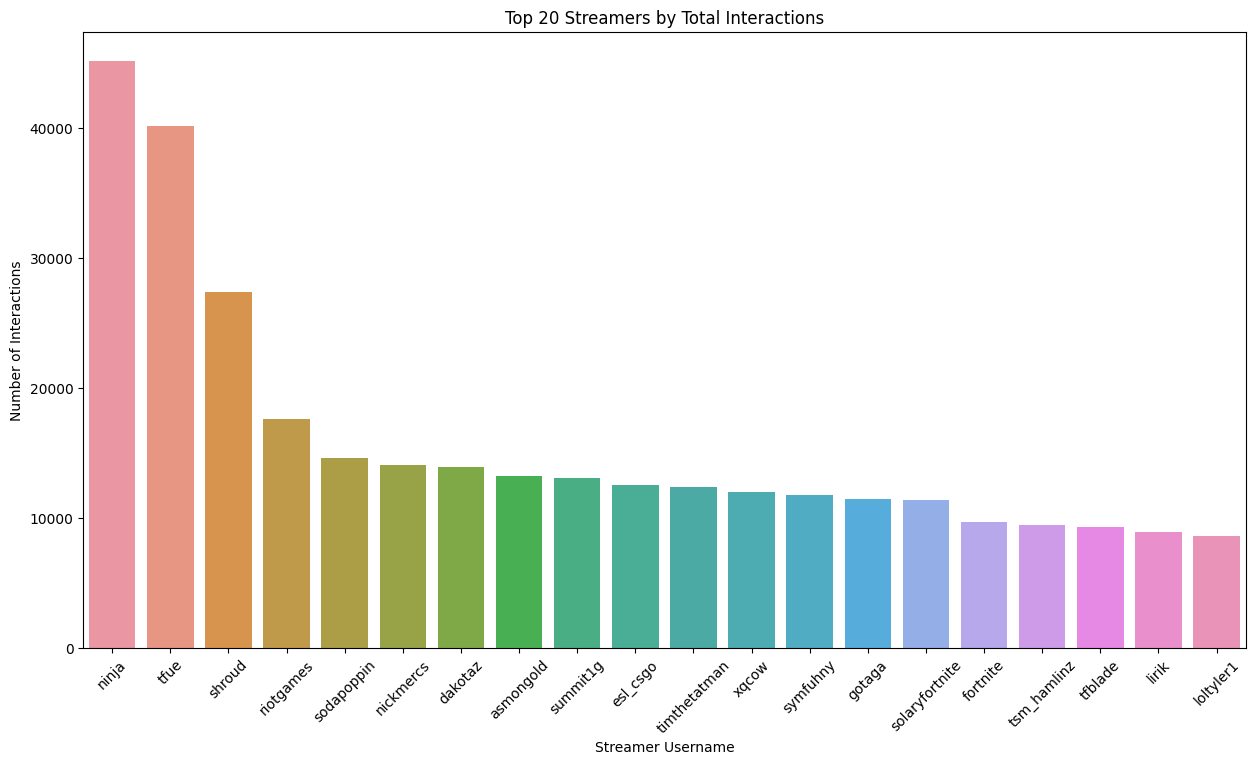

In [23]:

# Plotting the graph for the top 20 streamers by total interactions
plt.figure(figsize=(15, 8))
sns.barplot(x='Streamer Username', y='Interaction Count', data=sorted_streamers_df)
plt.xticks(rotation=45)
plt.xlabel('Streamer Username')
plt.ylabel('Number of Interactions')
plt.title('Top 20 Streamers by Total Interactions')
plt.show()


In [24]:
# Convert 'Time Start' and 'Time Stop' to datetime if they aren't already
df['Time Start'] = pd.to_datetime(df['Time Start'])
df['Time Stop'] = pd.to_datetime(df['Time Stop'])

# Calculate duration of each viewing session
df['Watch Duration'] = (df['Time Stop'] - df['Time Start']).dt.total_seconds() / 60 

In [25]:

# Group by 'Streamer Username' and sum the 'Watch Duration' for each streamer
total_watch_time_per_streamer = df.groupby('Streamer Username')['Watch Duration'].sum().sort_values(ascending=False)


In [26]:
# Optionally, you can display the top N streamers by total watch time
top_streamers_by_watch_time = total_watch_time_per_streamer.head(10)  # for top 10 streamers


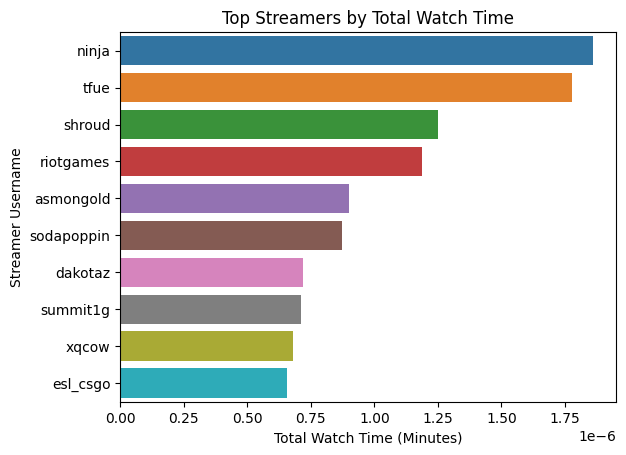

In [27]:

# Visualizing the top streamers by total watch time
sns.barplot(x=top_streamers_by_watch_time.values, y=top_streamers_by_watch_time.index)
plt.xlabel('Total Watch Time (Minutes)')
plt.ylabel('Streamer Username')
plt.title('Top Streamers by Total Watch Time')
plt.show()
